In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
hotel_df = pd.read_csv('hotel.csv')

display(hotel_df.head())
print(hotel_df.info())

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,342,1,July,27,1,0,0,2,...,0,0,0,C,C,3,Transient,0.0,0,0
1,Resort Hotel,0,7,1,July,27,1,0,1,1,...,0,0,0,A,C,0,Transient,75.0,0,0
2,Resort Hotel,0,13,1,July,27,1,0,1,1,...,0,0,0,A,A,0,Transient,75.0,0,0
3,Resort Hotel,0,14,1,July,27,1,0,2,2,...,0,0,0,A,A,0,Transient,98.0,0,1
4,Resort Hotel,0,0,1,July,27,1,0,2,2,...,0,0,0,C,C,0,Transient,107.0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85913 entries, 0 to 85912
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           85913 non-null  object 
 1   is_canceled                     85913 non-null  int64  
 2   lead_time                       85913 non-null  int64  
 3   arrival_date_year               85913 non-null  int64  
 4   arrival_date_month              85913 non-null  object 
 5   arrival_date_week_number        85913 non-null  int64  
 6   arrival_date_day_of_month       85913 non-null  int64  
 7   stays_in_weekend_nights         85913 non-null  int64  
 8   stays_in_week_nights            85913 non-null  int64  
 9   adults                          85913 non-null  int64  
 10  children                        85913 non-null  float64
 11  meal                            85913 non-null  object 
 12  market_segment                  

Text(0, 0.5, 'Total Count')

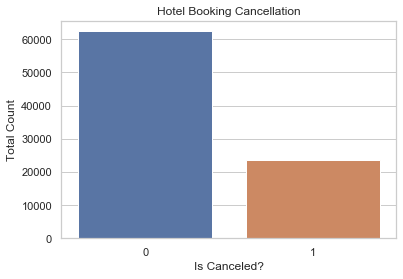

In [19]:
## Create X (features) and y(response)
X_features = hotel_df.drop('is_canceled', axis=1)
# display(X_features.head())
y_target = hotel_df.is_canceled
# display(y_target.head())


## is_cancelled

plt.figure(figsize=(6, 4))
sns.set(style="whitegrid")
ax = sns.countplot(x="is_canceled", data=hotel_df)
plt.title('Hotel Booking Cancellation')
plt.xlabel('Is Canceled?')
plt.ylabel('Total Count')

# checking frequncy of target classes
# y_target.value_counts()

In [4]:
# ## Splitiing hotel datasets into training and testing datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size = 0.3, 
                                                    random_state=0, stratify=y_target)

print ("Dimension of Training Dataset: ", X_train.shape)
print ("Dimension of Testing Dataset: ", X_test.shape)

Dimension of Training Dataset:  (60139, 23)
Dimension of Testing Dataset:  (25774, 23)


## List of numerical and categorical columns:

In [5]:
num_int_type = X_features.select_dtypes(include='int64').columns.tolist()
num_float_type = X_features.select_dtypes(include='float64').columns.tolist()

num_type = num_int_type + num_float_type
print("\n\nNumerical Types columns name: \n", num_type)

cat_object_type = X_features.select_dtypes(include='object').columns.tolist()
print("\n\nCategorical Types columns name: \n", cat_object_type)



Numerical Types columns name: 
 ['lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'required_car_parking_spaces', 'total_of_special_requests', 'children', 'adr']


Categorical Types columns name: 
 ['hotel', 'arrival_date_month', 'meal', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'customer_type']


In [6]:
## Encoding categoirical variables to numeric type - understandable to machine learning model
## scaling numerical variables with mean "0" and standard devaition "1"

from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer


# Preprocessing for numerical features:
num_transformer = make_pipeline(StandardScaler(),
                                SimpleImputer(strategy='constant'))

# Preprocessing for categorical features:
cat_transformer = make_pipeline(SimpleImputer(strategy='constant'),
                                OneHotEncoder(handle_unknown='ignore'))

## Transforming both numerical and catergorical columns based preprocessing above
column_transformer = make_column_transformer((num_transformer, num_type),
                                               (cat_transformer, cat_object_type))

column_transformer.fit_transform(X_train)

array([[-0.81262079, -1.76476562,  1.32729096, ...,  0.        ,
         1.        ,  0.        ],
       [-0.91947547,  1.15112805, -1.37963406, ...,  0.        ,
         0.        ,  1.        ],
       [ 4.05520353,  1.15112805, -0.50171243, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.16094407, -1.76476562,  0.81517001, ...,  0.        ,
         1.        ,  0.        ],
       [-0.86011176,  1.15112805, -1.37963406, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.92998267,  1.15112805, -0.79435297, ...,  0.        ,
         1.        ,  0.        ]])

### Model Evaluation

In [8]:
"""
    Evaluationg models:
    - DecisionTreeClassfier()
    - LogisticRegression()
    - GaussianNB()
    - MLPClassifier()
    
"""

from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.linear_model import LogisticRegression # Logistic Regression
from sklearn.naive_bayes import GaussianNB # Naives Bayes
from sklearn.neural_network import MLPClassifier # Neural Network


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# split1 = KFold(n_splits=5, shuffle=False, random_state=None)
split2 = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

# for train_ix, test_ix in split2.split(X_features, y_target):
#     # select rows
#     train_X, test_X = X_features.loc[train_ix], X_features.loc[test_ix]
#     train_y, test_y = y_target[train_ix], y_target[test_ix]
#     # summarize train and test composition
#     train_0, train_1 = len(train_y[train_y==0]), len(train_y[train_y==1])
#     test_0, test_1 = len(test_y[test_y==0]), len(test_y[test_y==1])
#     print('>Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (train_0, train_1, test_0, test_1))
    
    

base_models = [("DT_model", DecisionTreeClassifier(random_state=42)),
               ("LR_model", LogisticRegression(random_state=42,n_jobs=-1)),
               ("GNB_model", GaussianNB()), 
               ("MLP_model", MLPClassifier(hidden_layer_sizes=(13,13,13), max_iter=500))]
             
for name, model in base_models:
    # pack preprocessing of data and the model in a pipeline:
    model_steps = make_pipeline(column_transformer, model)
    
    # get cross validation score for each model:
    cv_results = cross_val_score(model_steps, 
                                 X_train, y_train, 
                                 cv=split2,
                                 scoring="accuracy",
                                 n_jobs=-1)
    # output:
    mean_score = round(np.mean(cv_results), 4)
    std_dev = round(np.std(cv_results), 4)
    print(f"{name} cross validation accuarcy score: {mean_score} +/- {std_dev}")


DT_model cross validation accuarcy score: 0.7486 +/- 0.0043
LR_model cross validation accuarcy score: 0.7857 +/- 0.0015
GNB_model cross validation accuarcy score: 0.7234 +/- 0.0124
MLP_model cross validation accuarcy score: 0.8048 +/- 0.0031


In [17]:
# ## Logistic Regression

# logreg = LogisticRegression(random_state=42,n_jobs=-1)

# logreg.fit(X_train, y_train)
# y_pred = logreg.predict(X_test)


# from sklearn import metrics
# print(metrics.accuracy_score(y_test, y_pred))
# print(metrics.confusion_matrix(y_test, y_pred))
# print(metrics.classification_report(y_test, y_pred))

In [18]:
# ## Decision Tree
# from sklearn.tree import DecisionTreeClassifier
# dt =DecisionTreeClassifier()

# dt.fit(X_train, y_train)
# y_pred = dt.predict(X_test)


# from sklearn import metrics
# print(metrics.accuracy_score(y_test, y_pred))
# print(metrics.confusion_matrix(y_test, y_pred))
# # print(metrics.classification_report(y_test, y_pred))

In [ ]:
# ## Naive Bayes
# # GaussianNB implements the Gaussian Naive Bayes algorithm for classification.
# from sklearn.naive_bayes import GaussianNB
# gnb_pipe = make_pipeline(column_trans, GaussianNB())

# gnb_pipe.fit(X_train, y_train)
# y_pred = gnb_pipe.predict(X_test)

# from sklearn import metrics
# print(metrics.confusion_matrix(y_test, y_pred))
# print(metrics.classification_report(y_test, y_pred))

In [ ]:
# ## Support Vector Machines
# from sklearn import svm
# svm_SVC_pipe = make_pipeline(column_trans, svm.SVC(kernel='linear')) # Linear Kernel for now

# svm_SVC_pipe.fit(X_train, y_train)
# y_pred = svm_SVC_pipe.predict(X_test)


# from sklearn import metrics
# print(metrics.accuracy_score(y_test, y_pred))
# print(metrics.confusion_matrix(y_test, y_pred))
# print(metrics.classification_report(y_test, y_pred))

In [ ]:
# ## Neural Networks
# from sklearn.neural_network import MLPClassifier
# MLP_pipe = make_pipeline(column_trans, MLPClassifier(hidden_layer_sizes=(13,13,13), max_iter=500))

# MLP_pipe.fit(X_train, y_train)
# y_pred = MLP_pipe.predict(X_test)


# from sklearn import metrics
# print(metrics.accuracy_score(y_test, y_pred))
# print(metrics.confusion_matrix(y_test, y_pred))
# print(metrics.classification_report(y_test, y_pred))

## Using a grid search

In [9]:

from sklearn.model_selection import GridSearchCV

# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [10]:
param_grid = {
    'logisticregression__C': [0.1, 1.0, 1.0],
    }

In [ ]:
grid_clf = GridSearchCV(logreg_pipe, param_grid, cv=10, iid=False)
grid_clf.fit(X_train, y_train);

grid_clf.best_params_

In [ ]:
print("best logistic regression from grid search: %f" % grid_clf.best_estimator_.score(X_test, y_test))